In [1]:
from keras import models, layers, optimizers

2024-06-13 12:34:54.778241: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-13 12:34:55.301333: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-13 12:34:55.301387: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-06-13 12:34:55.383598: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-13 12:34:56.516212: W tensorflow/stream_executor/platform/de

In [7]:
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3),activation = 'relu', input_shape = (150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    
    model.compile(
        optimizer = optimizers.RMSprop(learning_rate = 1e-4),
        loss = 'binary_crossentropy',
        metrics = ['acc']
    )
    
    return model

In [8]:
model = build_model()

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
train_data_gen = ImageDataGenerator(
    rescale = 1./255
)
val_data_gen = ImageDataGenerator(
    rescale = 1./255
)

In [17]:
import os
data_dir = '/home/mukesh/ml_dl_ds/deep_learning_algorithm/dataset'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
val_dir = os.path.join(data_dir, 'val')
train_generator = train_data_gen.flow_from_directory(
    train_dir,
    batch_size = 20,
    target_size = (150, 150),
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [18]:
val_generator = val_data_gen.flow_from_directory(
    val_dir,
    batch_size = 20,
    target_size = (150, 150),
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [21]:
history = model.fit(
    train_generator,
    epochs = 30,
    steps_per_epoch = 100,
    validation_data = val_generator,
    validation_steps = 50
)

Epoch 1/30


2024-06-13 12:51:53.220038: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 56074240 exceeds 10% of free system memory.
2024-06-13 12:51:53.272310: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 14018560 exceeds 10% of free system memory.
2024-06-13 12:51:53.279160: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 26542080 exceeds 10% of free system memory.
2024-06-13 12:51:53.352516: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19699200 exceeds 10% of free system memory.
2024-06-13 12:51:53.352608: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19699200 exceeds 10% of free system memory.


100/100 [==============================] - 41s 399ms/step - loss: 0.6883 - acc: 0.5265 - val_loss: 0.6634 - val_acc: 0.6190
Epoch 2/30
100/100 [==============================] - 42s 421ms/step - loss: 0.6571 - acc: 0.6055 - val_loss: 0.6547 - val_acc: 0.5890
Epoch 3/30
100/100 [==============================] - 43s 427ms/step - loss: 0.6131 - acc: 0.6595 - val_loss: 0.6026 - val_acc: 0.6840
Epoch 4/30
100/100 [==============================] - 44s 442ms/step - loss: 0.5692 - acc: 0.7065 - val_loss: 0.6337 - val_acc: 0.6340
Epoch 5/30
100/100 [==============================] - 43s 427ms/step - loss: 0.5362 - acc: 0.7225 - val_loss: 0.5811 - val_acc: 0.6890
Epoch 6/30
100/100 [==============================] - 43s 432ms/step - loss: 0.5105 - acc: 0.7445 - val_loss: 0.5650 - val_acc: 0.7120
Epoch 7/30
100/100 [==============================] - 43s 432ms/step - loss: 0.4757 - acc: 0.7695 - val_loss: 0.6543 - val_acc: 0.6480
Epoch 8/30
100/100 [==============================] - 43s 434ms/st

In [22]:
hist = history.history

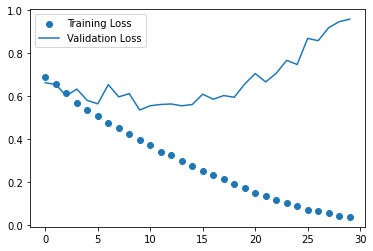

In [23]:
## plot loss of training and validation data set.
import matplotlib.pyplot as plt
plt.scatter(range(len(hist['loss'])), hist['loss'], label = 'Training Loss')
plt.plot(range(len(hist['val_loss'])), hist['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

In [24]:
model.save('basic_cat_dog_cnn_model.h5')

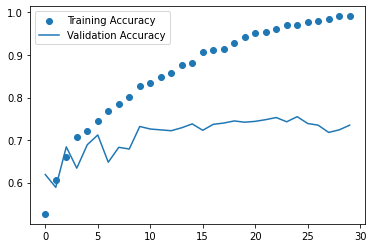

In [25]:
plt.scatter(range(len(hist['acc'])), hist['acc'], label = 'Training Accuracy')
plt.plot(range(len(hist['val_acc'])), hist['val_acc'], label = 'Validation Accuracy')
plt.legend()
plt.show()